Řešení obyčejných diferenciálních rovnic

Zadání:
Diferenciální rovnice představují jeden z nejdůležitějších nástrojů každého přírodovědně vzdělaného člověka pro modelování jevů kolem nás. Vaším úkolem je vybrat si nějakou zajímavou soustavu diferenciálních rovnic, která nebyla zmíněna v sešitech z hodin a pomocí vhodné numerické metody je vyřešit. Řešením se rozumí vizualizace jejich průběhu a jiných zajímavých informací, které lze z rovnic odvodit. Proveďte také slovní okomentování toho, co lze z grafu o modelovaném procesu vyčíst. 

Řešení:

In [7]:
!python -m pip install scipy
!python -m pip install sympy
!python -m pip install matplotlib

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

Logistická ODR
- jedna z nejpoužívanějších rovnic při modelování populačního růstu

In [10]:
def logistic(t, x, r, K):
    return r*(1-x/K)*x

solRK = solve_ivp(logistic, [0,15], [y0], method='RK45', args=(0.5,20))
solBDF = solve_ivp(logistic, [0,15], [y0], method='BDF', args=(0.5,20))

NameError: name 'y0' is not defined

In [11]:
plt.figure(figsize=(15,10), dpi=100)
plt.plot(solRK.t, solRK.y[0], color='green', label='RK45')
plt.plot(solBDF.t, solBDF.y[0], color='violet', label='BDF (Implicit Method)')
plt.legend()
plt.show()

NameError: name 'solRK' is not defined

<Figure size 1500x1000 with 0 Axes>

RK45 - is the Runga-Kutta ODE approximation method that works fine but is not smooth for any step size.

BDF - is an implicit method that is computationally more expensive but is more smooth than the RK45 method.

The graph tells us exactly what can be deduced from the ODE. Initially the population is 2 at time 0 and it grows steadily until it reaches the ceiling of 20. One can play around and see what would happen for a different initial value, rate of groth or ceiling.

For instance, suppose that the initial population was actually 100.

Here the graph tells us that the initial population of a 100 is unstable and decreases until reaches a stable level of 20 as dictated by the parameter K.

Exponenciální rozpad
- 

In [12]:
def expDecay(t,x, r=0.9):
    """
    r - reprezentuje rozpadový faktor (konstantu)
    """
    return -r*x

In [13]:
solRK = solve_ivp(expDecay, [0,10], [100], method='RK45')
solBDF = solve_ivp(expDecay, [0,10], [100], method='BDF')

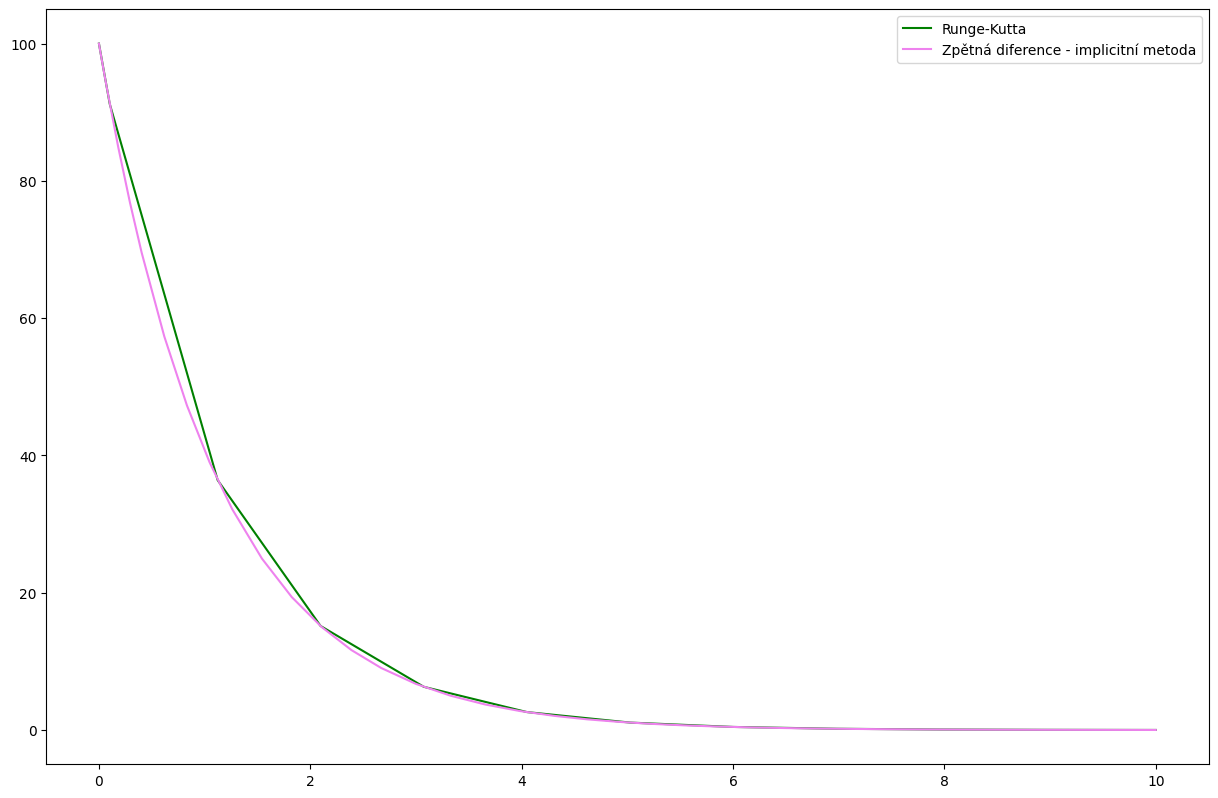

In [14]:
plt.figure(figsize=(15,10), dpi=100)
plt.plot(solRK.t, solRK.y[0], color='green', label='Runge-Kutta')
plt.plot(solBDF.t, solBDF.y[0], color='violet', label='Zpětná diference - implicitní metoda')
plt.legend()
plt.show()

This is a very classic ODE that often comes up in physics, geology and chemistry. It is often used to model the life-time of a certain isotope or element. The rate r, can be played around with to determine the speed at which decaying occurs.

Also, note how the BDF method is much smoother than the RK45 method.

We can also model exponential growth by choosing a positive r value.

Harmonický oscilátor

In [15]:
def harmonicOscillator(t, q, k, m):
    #definice závislých proměnných v=rychlost, x=vodorovná souřadnice
    v, x = q
    return [-(k/m)*x, v]

In [16]:
soleRK = solve_ivp(harmonicOscillator, [0,20], [0,1],method='RK45', args=(1,1), dense_output=True) 
solBDF = solve_ivp(harmonicOscillator, [0,20], [0,1],method='BDF', args=(1,1), dense_output=True)

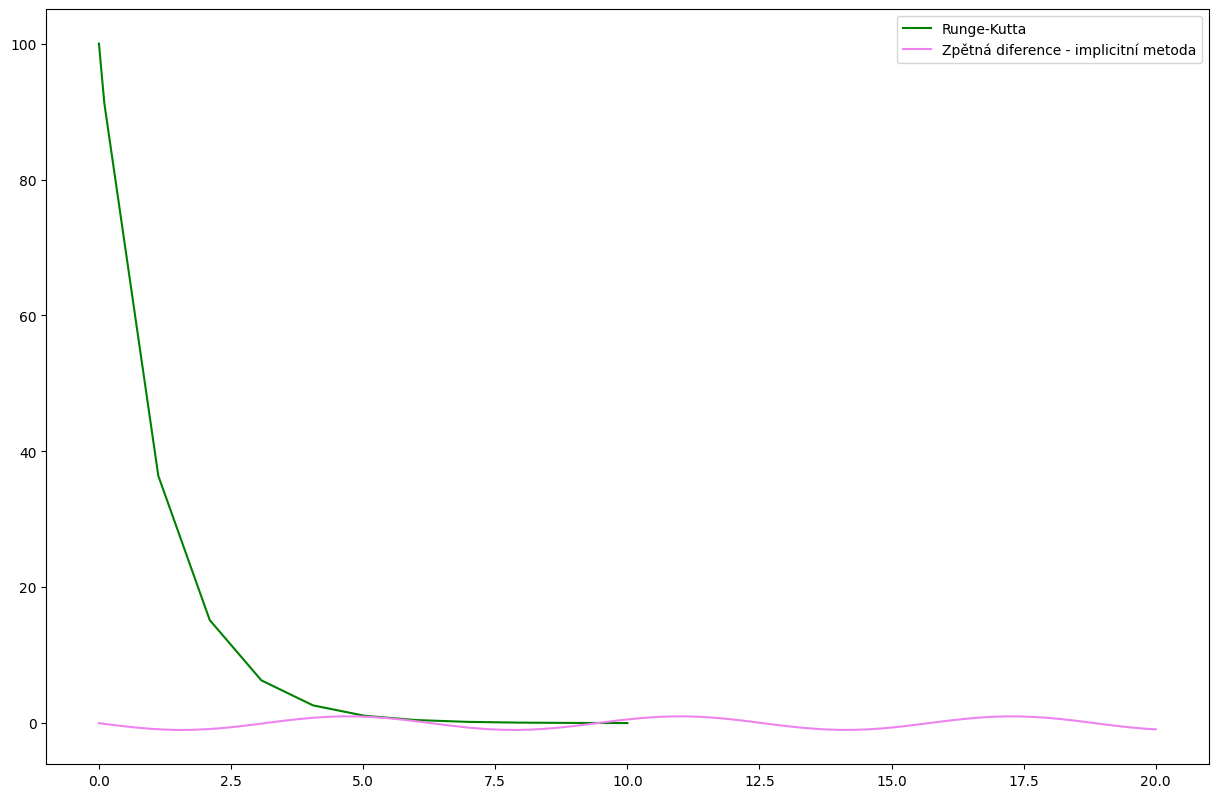

In [17]:
plt.figure(figsize=(15,10), dpi=100)
plt.plot(solRK.t, solRK.y[0], color='green', label='Runge-Kutta')
plt.plot(solBDF.t, solBDF.y[0], color='violet', label='Zpětná diference - implicitní metoda')
plt.legend()
plt.show()

This is the classic harmonic oscillator or simple pendulum without forcing or damping. Simply put, the graph tells us that in the absence of damping force, the oscillator will continue to oscillate in a sinusoidal fashi